In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Скачайте текст, очистите его, оставив только русские буквы и символы пробела.

In [9]:
with open('Series/tom_1.txt', 'r', encoding='utf8') as f :
    text = f.read().lower()
with open('Series/tom_2.txt', 'r', encoding='utf8') as f :
    text += ' ' + f.read().lower()
with open('Series/tom_3.txt', 'r', encoding='utf8') as f :
    text += ' ' + f.read().lower()
with open('Series/tom_4.txt', 'r', encoding='utf8') as f :
    text += ' ' + f.read().lower()
    
text = re.sub('[^а-я ]','', text)
text = re.sub("\s{2,}"," ", text)

In [10]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

# Постройте матрицу переходных вероятностей

In [12]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [13]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

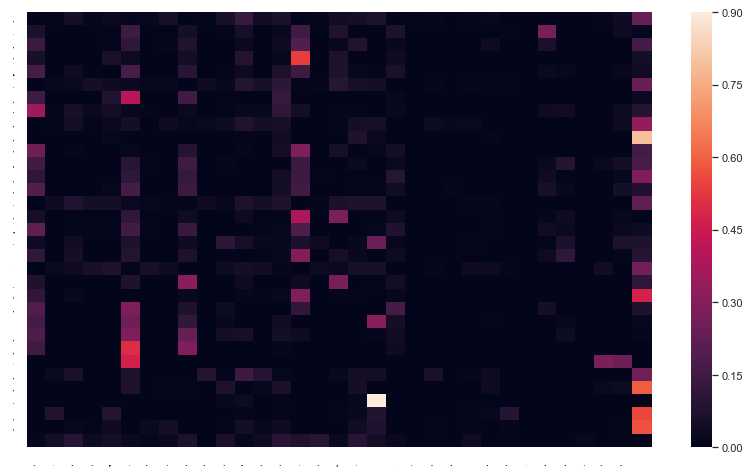

In [14]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1)
sns.heatmap(df)
plt.show()

# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [16]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    if proba > 0:
        print(''.join(['п', c, c, 'р']), proba)

паар 6.548588855486646e-05
пввр 8.061375239718782e-09
пггр 8.404252440531007e-07
пеер 0.00031067717456702987
пиир 9.082901630459213e-06
пккр 5.060157736201698e-06
пллр 1.6577565638224666e-08
пммр 9.024270533904558e-10
пннр 1.1030468212524795e-07
поор 0.0007418130928454017
пппр 1.5432670184671536e-05
пррр 3.8029814665187574e-06
псср 4.536806301296663e-08
пттр 3.054647665316708e-06
пуур 2.215096465901715e-05
пффр 6.545072675636042e-06
пччр 1.8101875438441637e-07
пшшр 1.3138345233524198e-09
пщщр 2.2039181384492605e-09
пыыр 6.3107291512105275e-06
пььр 1.524536395267123e-07
пээр 5.246799445815005e-09
пяяр 1.2779695702434225e-06
п  р 1.2896659647963282e-06


In [18]:
## мне и самому сложно придумать такое слово :)

# Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

In [19]:
s = []
start ='б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бы зно бы


# Выберите ряд и оцените его через HMM

In [20]:
from hmmlearn.hmm import GaussianHMM

In [21]:
auto_reg = pd.read_csv("Series/monthly-us-auto-registration-tho.csv")

auto_reg0 = auto_reg.ix[:,0].str.split(';')
data=[]
index=[]

for arr in auto_reg0.values:
    index.append(arr[0])
    data.append(int(arr[1]))
auto_reg_ready = pd.Series(data = data, index = index)

series = auto_reg_ready

In [22]:
values = series.values.reshape(-1,1)

In [23]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1718.8444015815162
2 -1620.7187241098577
3 -1556.7373048635782
4 -1525.365522155637
5 -1506.394853287039
6 -1496.609554182614
7 -1485.2254839978189
8 -1480.5447769815214
9 -1470.468487276908
10 -1461.0414432101388
11 -1464.1175939486147
12 -1447.8371247059065
13 -1449.4657386238089
14 -1443.242426020559
15 -1435.5960917076677
16 -1425.886366452442
17 -1416.9752902604241
18 -1398.743474534127
19 -1398.9505515893889


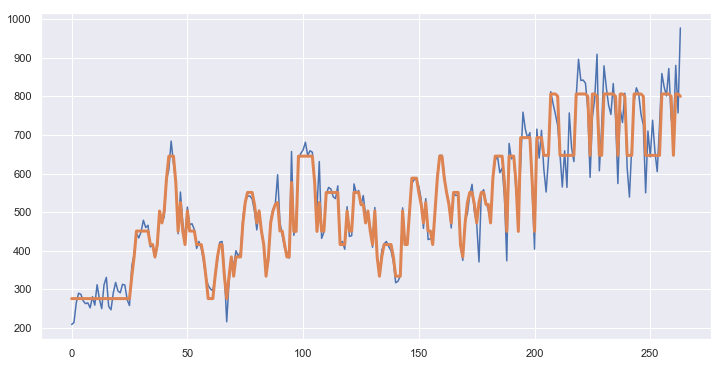

In [24]:
model = GaussianHMM(n_components=18,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [25]:
model.transmat_.shape

(18, 18)

In [26]:
## признаться честно, я до конца не разобрался с заданием HMM, здесь ваш же код с другим временным рядом